# Computational Social Science Project #3 

**Enter your Name:** Namita Karnik

*Semester:* Fall 2023

## 1. Introduction

### Load data 

In [1]:
#
# loading all the libraries #I've loaded a few later on as wlel

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [2]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [3]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [6]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### 



















Visualization

Let's visualize what inspections look like over time.

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

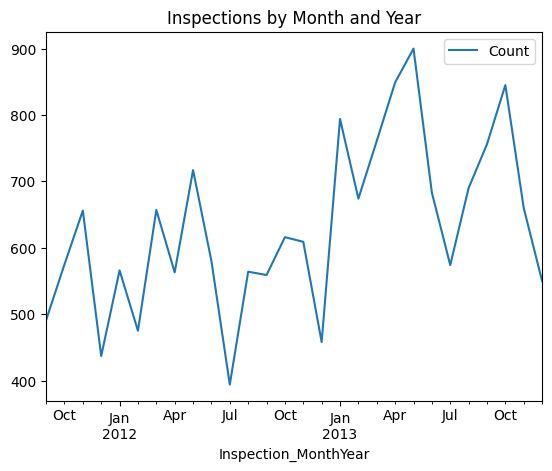

In [7]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year")

Let's visualize what the distribution of results looks like.

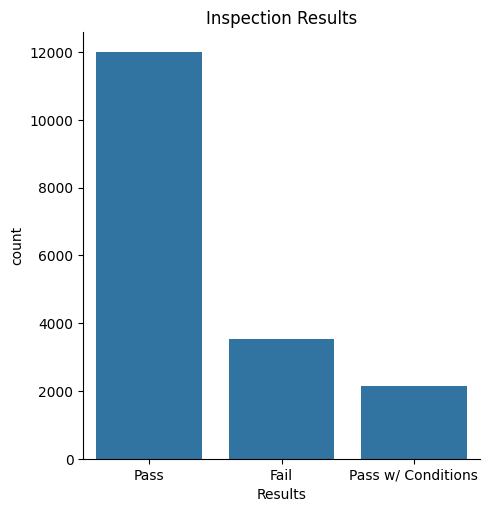

In [8]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

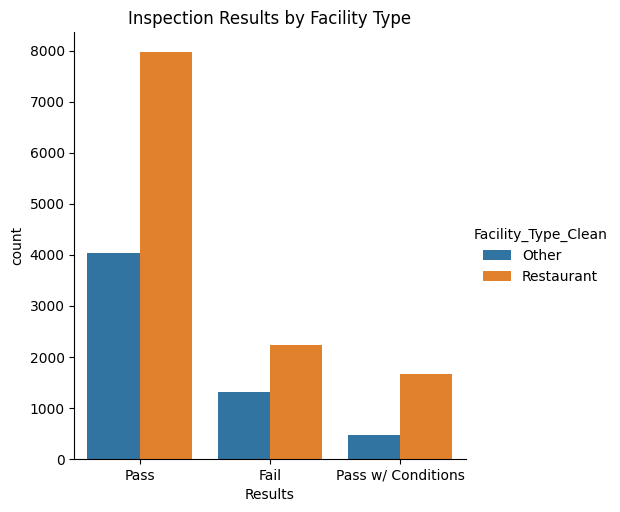

In [9]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [10]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [11]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results'])

# get dummies
X = pd.get_dummies(X)

In [12]:
# view feature datset
X.head()

criticalCount  seriousCount  \
Inspection_ID DBA_Name                                                    
269961        SEVEN STAR                                0             0   
507211        PANERA BREAD                              0             0   
507212        LITTLE QUIAPO RESTAURANT                  0             2   
507216        SERGIO'S TAQUERIA PIZZA INC.              0             0   
507219        TARGET STORE # T-2079                     0             2   

                                            minorCount  pastFail  \
Inspection_ID DBA_Name                                             
269961        SEVEN STAR                             2         0   
507211        PANERA BREAD                           3         0   
507212        LITTLE QUIAPO RESTAURANT               6         0   
507216        SERGIO'S TAQUERIA PIZZA INC.           6         0   
507219        TARGET STORE # T-2079                  6         0   

                                            pastCritical  pastSerious  \
Inspection_ID DBA_Name                                                  
269961        SEVEN STAR                               0            0   
507211        PANERA BREAD                             0            0   
507212        LITTLE QUIAPO RESTAURANT                 0            0   
507216        SERGIO'S TAQUERIA PIZZA INC.             0            0   
507219        TARGET STORE # T-2079                    0            0   

                                            pastMinor  timeSinceLast  \
Inspection_ID DBA_Name                                                 
269961        SEVEN STAR                            0            2.0   
507211        PANERA BREAD                          0            2.0   
507212        LITTLE QUIAPO RESTAURANT              0            2.0   
507216        SERGIO'S TAQUERIA PIZZA INC.          0            2.0   
507219        TARGET STORE # T-2079                 0            2.0   

                                            firstRecord  POLICE_DISTRICT  \
Inspection_ID DBA_Name                                                     
269961        SEVEN STAR                              1             19.0   
507211        PANERA BREAD                            1             24.0   
507212        LITTLE QUIAPO RESTAURANT                1             17.0   
507216        SERGIO'S TAQUERIA PIZZA INC.            1             17.0   
507219        TARGET STORE # T-2079                   1             24.0   

                                            ageAtInspection  \
Inspection_ID DBA_Name                                        
269961        SEVEN STAR                          10.964384   
507211        PANERA BREAD                         7.457534   
507212        LITTLE QUIAPO RESTAURANT             4.578082   
507216        SERGIO'S TAQUERIA PIZZA INC.         7.805479   
507219        TARGET STORE # T-2079                5.290411   

                                            consumption_on_premises_incidental_activity  \
Inspection_ID DBA_Name                                                                    
269961        SEVEN STAR                                                              0   
507211        PANERA BREAD                                                            0   
507212        LITTLE QUIAPO RESTAURANT                                                0   
507216        SERGIO'S TAQUERIA PIZZA INC.                                            0   
507219        TARGET STORE # T-2079                                                   0   

                                            tobacco  package_goods  \
Inspection_ID DBA_Name                                               
269961        SEVEN STAR                          1              0   
507211        PANERA BREAD                        0              0   
507212        LITTLE QUIAPO RESTAURANT            0              0   
507216        SERGIO'S TAQUERIA PIZZA INC.        0          

In [13]:
chicago_inspections_2011_to_2013

,,Facility_Type,Risk,Inspection_Type,Results,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_DESCRIPTION,APPLICATION_TYPE,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,Grocery Store,Risk 3 (Low),Canvass,Pass,Other,0,0,2,0,0,0,0,2.000000,1,44-33,19.0,Retail Food Establishment,RENEW,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
507211,PANERA BREAD,Restaurant,Risk 1 (High),Canvass,Pass,Restaurant,0,0,3,0,0,0,0,2.000000,1,50-23,24.0,Retail Food Establishment,RENEW,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
507212,LITTLE QUIAPO RESTAURANT,Restaurant,Risk 1 (High),Canvass,Fail,Restaurant,0,2,6,0,0,0,0,2.000000,1,50-25,17.0,Retail Food Establishment,RENEW,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
507216,SERGIO'S TAQUERIA PIZZA INC.,Restaurant,Risk 1 (High),Canvass,Pass,Restaurant,0,0,6,0,0,0,0,2.000000,1,39-48,17.0,Retail Food Establishment,RENEW,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
507219,TARGET STORE # T-2079,Restaurant,Risk 2 (Medium),Canvass,Fail,Restaurant,0,2,6,0,0,0,0,2.000000,1,40-18,24.0,Retail Food Establishment,RENEW,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393258,CIAO BELLA CAFE,Restaurant,Risk 1 (High),Canvass,Pass,Restaurant,0,0,6,1,0,2,6,0.452055,0,49-36,24.0,Retail Food Establishment,ISSUE,0.726027,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,25.370000,7.963333,0.776667,10.537839,1.376266,21.726951,0
1395218,Christian Fields Style Bar,Restaurant,Risk 2 (Medium),Canvass,Pass,Restaurant,0,0,4,0,0,1,4,1.200000,0,20-18,3.0,Retail Food Establishment,RENEW,4.120548,0,0,0,0,0,1,0,0,0,0,0,0,0.000100,34.586667,9.820000,0.676667,56.680038,19.736283,32.355622,0
1395224,W CHICAGO - LAKESHORE,Restaurant,Risk 1 (High),Canvass,Pass w/ Conditions,Restaurant,3,3,5,0,0,0,0,2.000000,1,42-63,18.0,Retail Food Establishment,ISSUE,0.879452,0,0,0,0,0,0,0,0,0,0,0,0,0.000100,34.586667,9.820000,0.676667,10.937753,0.000002,19.213021,1


## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

Q. Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problemDetail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem:

Ans: The first model I chose is the *Logistic Regression model*. It assumes a linear relationship between features and the outcome and is especially good at predicting binary outcomes (like our data set). The curve of a logistic regression is s shaped. It is much easier to train computationally and is the most basic supervised machine learning model out there. However, some of its cons are the same, that it assumes linearity, limiting it. It is designed for binary problems and won’t always be suitable for highly complex problems. There are also issues with overfitting, and it not performing well with limited data. It was one of the easier models to understand, and took the least amount of time to run, giving pretty accurate results, which is why I chose it. However, it needed the data to be scaled, and I had to reshape the data into 1D arrays for this model to run. 

*Decision Tree Classifier*
It is a tree-based supervised machine learning model, in which the algorithm (outcome) is first split at the root node, with further splits which can go up to each individual data point in the dataset. The last nodes are called the root nodes. I chose this because I like visualizing the data analysis in a tree format, which makes it easy to understand, especially at the nodes (splits). It is helpful in understanding what the most important features are. It also deals well with outliers and does not assume a linear model. At the same time, it is easier to overfit, especially if we let the model run without setting a ‘pruning’ limit. 

*XGBoost*
The full form of XGBoost is eXtreme Gradient Boosting, and it is a form of ensemble machine learning algorithm. It is quite efficient, and especially useful for complex and large datasets. I like this method because it’s usually more robust than the other models, and also because it allocates a feature importance score (which is helpful in visualization and understanding of the concept). However, it can take a substantial amount of time and computational power to run. It can also lead to overfitting, as this model tends to be more sensitive to 

For the last two models, I utilized cross validation. For Logistic Regression model, I used to training set. 

Also, ince we would eventually be using the best model to predict on 2014 scores, I have used hyperparameter tuning later only in that part of the project. My laptop was running GridSearchCV quite slowly, and I tried using random search as well, but wasn't sure if I could replace the former with the latter. se. 




### Model 1: Logistic Regression

In [14]:
#splitting the data. I am aware that we need to test on 2014 data. The X_test and y_test here are actually validation sets. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size=0.8, 
                                                  stratify=y, random_state=42)

In [15]:
# import libraries for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# fit scaler on the training data and transform both the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# assuming y_train and y_test are column vectors, reshape them to 1D arrays
y_train = y_train.ravel()
y_test = y_test.ravel()

# create a logistic regression model
model = LogisticRegression(max_iter=1000)

# fit the model on the training data
model.fit(X_train_scaled, y_train)

# make predictions on the test set
y_pred = model.predict(X_test_scaled)

# evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

# print the metrics
print(f" Accuracy: {accuracy} \n Precision: {precision} \n Recall: {recall} \n F1 Score: {f1}")

 Accuracy: 0.8965066927848514 
 Precision: 0.7563884156729132 
 Recall: 0.7184466019417476 
 F1 Score: 0.7369294605809129


### Model 2: Decision Tree Classifier

In [16]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

%matplotlib inline
#sns.set_style("darkgrid")

In [17]:
dt_classifier = tree.DecisionTreeClassifier(
                       criterion='gini',              # or 'entropy' for information gain
                       splitter='best',               # or 'random' for random best split
                       max_depth=None,                # set how deep tree nodes can go
                       min_samples_split=2,           # samples needed to split node
                       min_samples_leaf=1,            # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,             # number of features to look for when splitting
                       max_leaf_nodes=None,           # max nodes
                       min_impurity_decrease=1e-07,   # early stopping
                       random_state = 10)             #random seed

In [18]:
scoring = {
          'accuracy': make_scorer(accuracy_score),
          'recall': make_scorer(recall_score),
          'precision': make_scorer(precision_score),
          'f1': make_scorer(f1_score)
          }

In [19]:
# perform cross-validation with 5-fold and return the trained estimators
cv_results = cross_validate(dt_classifier,        # specify estimator 
                            X,                     # specify features
                            y.ravel(),             # specify outcome, and use ravel
                            cv=5,                  # specify 5-fold cross validation
                            return_estimator=True, # return the estimators fitted at each split
                            scoring=scoring)       # which scoring metrics to return (the whole list in this case)
 
# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = cv_results[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")

accuracy: 0.906
recall: 0.762
precision: 0.768
f1: 0.765


In [20]:
### Model 3: XGBoost

In [21]:
import xgboost as xgb  # Import XGBoost

xgb_classifier = xgb.XGBClassifier(random_state=10)


# define the scoring metrics
scoring = {
          'accuracy': make_scorer(accuracy_score),
          'recall': make_scorer(recall_score),
          'precision': make_scorer(precision_score),
          'f1': make_scorer(f1_score)
          }

# perform cross-validation with 5-fold and return the trained estimators
cv_results = cross_validate(xgb_classifier,        # specify estimator 
                            X,                     # specify features
                            y.ravel(),             # specify outcome, and use ravel
                            cv=5,                  # specify 5-fold cross validation
                            return_estimator=True, # return the estimators fitted at each split
                            scoring=scoring)       # which scoring metrics to return (the whole list in this case)
 
# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = cv_results[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")

accuracy: 0.918
recall: 0.835
precision: 0.777
f1: 0.805


### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

*Logistic regression:*
Accuracy: 0.8965066927848514 
Precision: 0.7563884156729132 
Recall: 0.7184466019417476 
F1 Score: 0.7369294605809129

*Decision tree classifier:*
accuracy: 0.906
recall: 0.762
precision: 0.768
f1: 0.765

*XGBoost:*
accuracy: 0.918
recall: 0.835
precision: 0.777
f1: 0.805

-Accuracy is bascically the sum of true positives and true negatives divided by the total number of samples. It is an overall measure of how well the model is performing, but results are only good when the model is balanced. 

-Precision is a measure of of the true positives that a model predictions. It is a ratio of true positives to the total predicted positives, and is useful when false positives are a concern. 

-Recall is a ratio of of true positives to the sum of true positives and false negatives. 

-F1 is a combination of precision and recall (a harmonic mean of the two). It is useful when there is imbalanced data, because it considers both false positives and false negatives.

In this case, since the data is imbalanced, given that we have more restaurants passing the food inspection than failing it, I think the F1 score is the most important. Also, both false positives and false negatives are costly, given that the Department of Public Health will be spending money on these audits (so minimizing it is benificial), but at the same time, it is in the wider public health interest to minimize businesses with poor food safety standards. 

## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

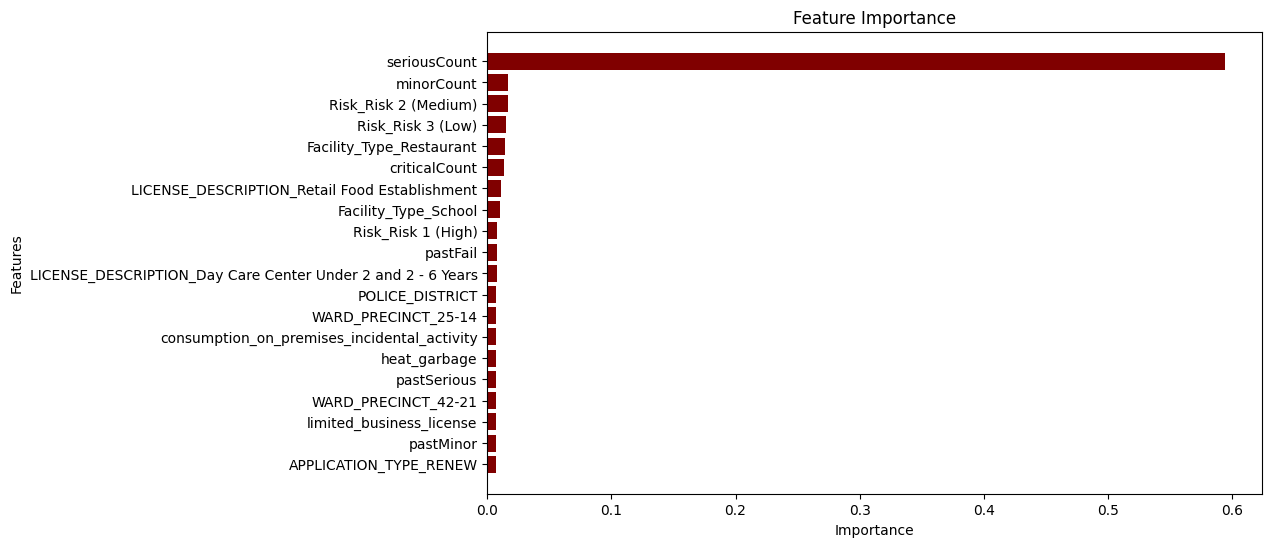

In [22]:
# Visualizing the feature importance 

# Initialize an array to hold the feature importances
importances = np.zeros(X.shape[1])

# Average the feature importances over the folds
for estimator in cv_results['estimator']:
    importances += estimator.feature_importances_
    
# Divide by the number of folds
importances /= 5  

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({'feature': X.columns, 
                                   'importance': importances})

# Sort the features by importance
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Take the top 10 features
feature_importance = feature_importance.head(20)

# Plot the feature importances
plt.figure(figsize=(10, 6))

# horizontal bar plot
plt.barh(feature_importance['feature'], 
         feature_importance['importance'], 
         color='maroon', 
         align='center')

# labels
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')

# gca stands for "get current axis", which allows you to modify the properties of the axes.
# and then inverts the y-axis, meaning that the values that were at the bottom will now be at the top, and vice versa.
plt.gca().invert_yaxis() 
plt.show()

Ans: These are the top 20 features that are the most important in determining outcomes of whether a business will pass or fail the food inspection. Serious count is the feature that influences our model the most, more so than almost all the other 19 indicators combined. This is followed by minorCount, Risk_Risk 2 (medium) and Risk-Risk 3 (Low). In terms of determining the outcomes, seriousCount seems to be the most important feature. 

I am curious about what the average number of daily/monthly customers these businesses have. It would be nice to have that data, because it would be helpful in understanding what audits to prioritize. The higher number of customers, the bigger public health threat it is.

### 4. Policy Simulation

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

I am choosing the XGBoost model, since it has the highest score in all four parameters that we compare our models on, including the highest F1 score. 

In [23]:
## 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
#I have chosen XGBoost, for all the reasons stated in the last section. 
#I first attempted to visualize accuracy for both xgboost and ensemble, mostly to understand how those two have similar results, given that
#XGBoost is considred as a type of ensemble learning. 

#Also, please note that I've been running these heavy codes in multiple cells, because I was finding out about computational issues and fixing
#them as I go along. 

#XGBoost accuracy
# ----------
xgb_classifier = xgb.XGBClassifier(random_state=10)

# specify voting classifiers
# ----------
voting_classifier = VotingClassifier(
                        # specify estimators to use
                        estimators = [
                                     ('xgb', xgb_classifier)],
                        # specify voting
                        voting = 'hard')

# loop through each model to report accuracy
# ----------
for clf, label in zip([ 
                       xgb_classifier,
                       voting_classifier], ['XGBoost',
                                            'Ensemble']):
         scores = cross_val_score(clf, 
                                  X, 
                                  y.ravel(),
                                  scoring='f1', 
                                  cv=5)
         print('Accuracy: %0.2f [%s]' % (scores.mean(), label))

Accuracy: 0.80 [XGBoost]
Accuracy: 0.80 [Ensemble]


In [24]:
# specify a "soft" voting classifer in this iteration
# ----------
voting_classifier = VotingClassifier(
                        # specify estimators to use
                        estimators = [ 
                                     ('xgb', xgb_classifier)],
                        # specify voting 
                        voting = 'soft')

# fit each classifer "c" to the data, predict the probability of tha clasifer and store as "probas"
probas = [c.fit(X, y.ravel()).predict_proba(X)[:,1] for c in (
                                                              xgb_classifier,
                                                                  voting_classifier)]

In [25]:
# created a dataset from the predicted probabilities
# ----------
probs_df = pd.DataFrame.from_records(probas).T # pulls the list of "probas" and stores as dataframe
probs_df.rename(columns = {0:  'xgb',
                           1: 'ensemble'}, 
                inplace = True)

# view the first few observations
# ----------
probs_df.head(10)

##ANS: The comparision yielded very similar results between these models, proving in code what I knew in theory!!

,xgb,ensemble
0,0.000120,0.000120
1,0.000078,0.000078
2,0.845789,0.845789
3,0.000561,0.000561
4,0.877222,0.877222
5,0.764791,0.764791
6,0.000098,0.000098
7,0.000017,0.000017
8,0.000094,0.000094
9,0.000138,0.000138


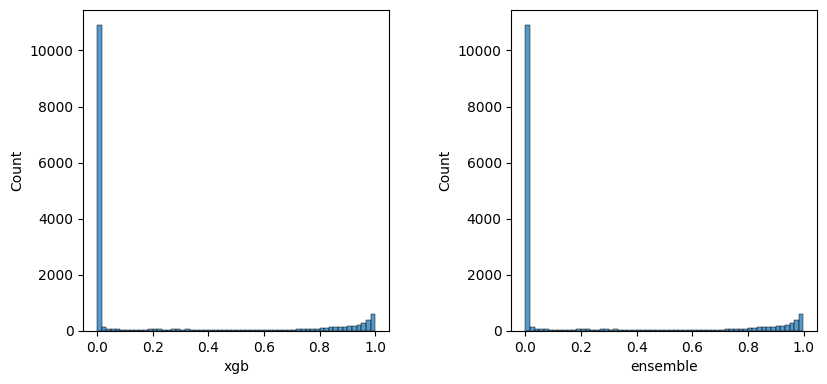

In [26]:
# I also visualized these distributions
# ----------
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 3, 4)
sns.histplot(probs_df, x="xgb", ax=ax)

ax = fig.add_subplot(2, 3, 5)
sns.histplot(probs_df, x="ensemble", ax=ax)

plt.show()

In [27]:
#I then ran the xgboost model again using a different method, to find both accuracy and ?????????
#like mentioned aboe, the data has been split into multiple sets so it runs smoothly. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

y_train = y_train.ravel()
y_test = y_test.ravel()

In [28]:
model = xgb.XGBClassifier(random_state=10)

In [29]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [30]:
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1 Score': make_scorer(f1_score)}

In [31]:
#Imported RandomizedSearchCV, but then I changed my strategy, because I wasn't sure if this would be okay. 
from sklearn.model_selection import RandomizedSearchCV

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train[:1000], y_train[:1000])  

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=10, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='f1')

In [32]:
best_params = grid_search.best_params_

In [33]:
final_model = xgb.XGBClassifier(random_state=10, **best_params)
final_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=10, ...)

In [34]:
cv_results = cross_validate(final_model, 
                            X, 
                            y.ravel(), 
                            cv=5, 
                            scoring=scoring)

In [35]:
#Best hyperparametrs. 

print(f"Best Hyperparameters: {best_params}\n")
for metric in ['test_Accuracy', 'test_Recall', 'test_Precision', 'test_F1 Score']:
    scores = cv_results[metric]
    print(f"{metric[5:]}: {scores.mean():}")

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}

Accuracy: 0.9228005270550744
Recall: 0.8672053416416212
Precision: 0.7771074594435687
F1 Score: 0.8191051350567513


**Just want to point out that after hyperparameter tuning, the XGBoost scores improved from 9.18 to 0.927 for accuracy, recall from 0.835 to 0.917 and F1 score from 0.805 to 0.836. However, precision decreased very slightly, which makes sense intutively.**

In [42]:
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------

#predict probabilities for the positive class (1)
y_probabilities = final_model.predict_proba(X_test)[:, 1]

# create a DataFrame with outcomes and probabilities
audit_results = pd.DataFrame({'Outcome': y_test.ravel(), 'Probability': y_probabilities})

# sort by probability in descending order
sorted_audits = audit_results.sort_values(by='Probability', ascending=False)
sorted_audits

#** As seen below, businesses with a higher probability of failing, are more likely to be audited. **#

,Outcome,Probability
1256,1,0.997605
1812,1,0.997104
162,1,0.996999
301,1,0.996311
2384,1,0.996282
...,...,...
2646,0,0.000068
278,0,0.000059
736,0,0.000057
753,0,0.000056


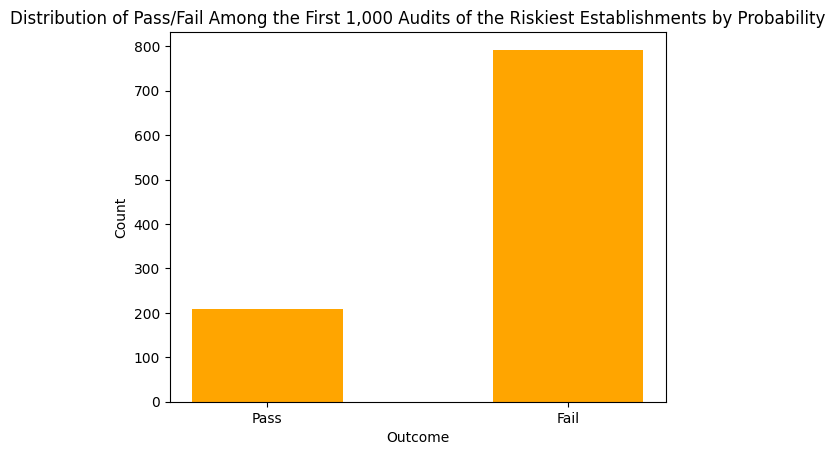

In [72]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------

# select the first 1,000 observations
first_1000_audits = sorted_audits.head(1000)

# plot the distribution
plt.hist(first_1000_audits['Outcome'], bins=[-0.5, 0.5, 1.5], align='mid', rwidth=0.5, color='orange')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Pass/Fail Among the First 1,000 Audits of the Riskiest Establishments by Probability')
plt.xticks([0, 1], ['Pass', 'Fail'])
plt.show()

                                            Facility_Type             Results
Inspection_ID DBA_Name                                                       
1150434       R.  MCCARTY ENTERPRISES, INC.    Restaurant                Pass
1353398       MCDONALD'S                       Restaurant                Pass
598503        MICELI'S DELI & FOOD MART        Restaurant                Pass
1229246       Barry                                School                Pass
1236123       STARBUCKS COFFEE #2397           Restaurant                Pass
...                                                   ...                 ...
679404        WHITE CASTLE #23                 Restaurant                Pass
1092468       CHICAGO BAGEL AUTHORITY          Restaurant                Pass
1335581       RICHARD ANDRISE                  Restaurant                Pass
1084412       CHICAGO WINGS                    Restaurant                Fail
670980        THAI OSCAR                       Restaurant  Pass 

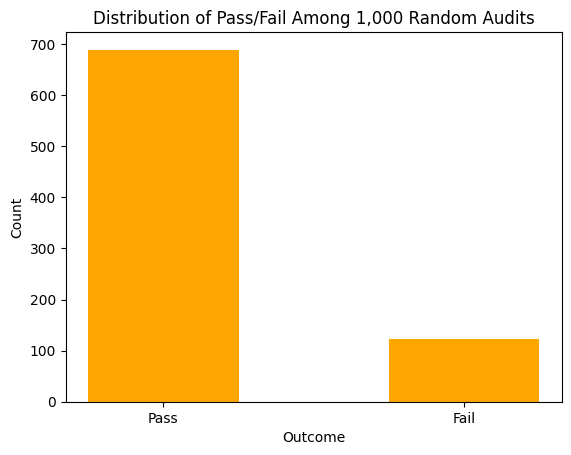

In [74]:
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

# set random state
random = 47

# pick columns we care about to print
key_columns = ['Facility_Type', 'Results',]  

# sample 1,000 observations randomly
random_audits = chicago_inspections_2011_to_2013[key_columns].sample(n=1000, random_state=random)

print(random_audits)

# plot the distribution
plt.hist(random_audits['Results'], bins=[-0.5, 0.5, 1.5], align='mid', rwidth=0.5, color='orange')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Pass/Fail Among 1,000 Random Audits')
plt.xticks([0, 1], ['Pass', 'Fail'])
plt.show()

Despite the random audits being focused in on higher risk restaurants, there is still a much higher possibility (6x) that the restaurant will pass the audit. It must be noted, that we have combined pass and pass with conditions, so there is that distribution to consider as well. 

There is a high variance in the audit data collected, with multiple different itirations will lead to multiple types of distributions

### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [46]:
# data processing

chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv", 
                                      low_memory=False)

Test_2014 = chicago_inspections_2014['Results']

# binarize the outcome variable 
Test_2014 = Test_2014.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
Test_2014 = lb_style.fit_transform(Test_2014)

# recode 0s and 1s so 1s are "Fail"
Test_2014 = np.where(Test_2014 == 1, 0 ,1)

# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome, also date and time info
chicago_inspections_2014.drop(columns = ['AKA_Name', 
                                         'License',
                                         'Address',
                                         'City',
                                         'State',
                                         'Zip',
                                         'Latitude',
                                         'Longitude',
                                         'Location',
                                         'ID',
                                         'LICENSE_ID',
                                         'LICENSE_TERM_START_DATE',
                                         'LICENSE_TERM_EXPIRATION_DATE',
                                         'LICENSE_STATUS',
                                         'ACCOUNT_NUMBER',
                                         'LEGAL_NAME',
                                         'DOING_BUSINESS_AS_NAME',
                                         'ADDRESS',
                                         'CITY',
                                         'STATE',
                                         'ZIP_CODE',
                                         'WARD',
                                         'PRECINCT',
                                         'LICENSE_CODE',
                                         'BUSINESS_ACTIVITY_ID',
                                         'BUSINESS_ACTIVITY',
                                         'LICENSE_NUMBER',
                                         'LATITUDE',
                                         'LONGITUDE',
                                         'Inspection_Date',
                                         'minDate',
                                         'maxDate',
                                         'Results'],
                                     inplace = True)

# set index
chicago_inspections_2014.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)


# create feature dataset
X2014 = chicago_inspections_2014.drop(columns = ['Facility_Type', 
                                                 'LICENSE_DESCRIPTION', 
                                                 'WARD_PRECINCT'])

# get dummies
X2014 = pd.get_dummies(X2014)

In [47]:
model = xgb.XGBClassifier()
# define a hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}


# perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X2014[:1000], Test_2014[:1000])  

# get the best parameters
best_params = grid_search.best_params_

# use the best parameters to train the final model
final_model = xgb.XGBClassifier(random_state=10, **best_params)
final_model.fit(X2014, Test_2014)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=10, ...)

In [48]:

# perform cross-validation with 5-fold and return the trained estimators
cv_results = cross_validate(final_model,            # specify estimator 
                            X2014,                     # specify features
                            Test_2014.ravel(),             # specify outcome, and use ravel
                            cv=4,                      # specify 4-fold cross validation
                            return_estimator=True,     # return the estimators fitted at each split
                            scoring=scoring)           # which scoring metrics to return (the whole list in this case)
 
# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_Accuracy', 'test_Recall', 'test_Precision', 'test_F1 Score']:
    scores = cv_results[metric]
    print(f"{metric[5:]}: {scores.mean():}")

Accuracy: 0.903309291631091
Recall: 0.8131944444444444
Precision: 0.7278750939081174
F1 Score: 0.7664761370646049


In [49]:
# predict and compare 

# predict probabilities for the positive class (1)
Test_2014_probabilities = final_model.predict_proba(X2014)[:, 1]

# create a DataFrame with outcomes and probabilities
audit_results = pd.DataFrame({'Outcome': Test_2014.ravel(), 'Probability': Test_2014_probabilities})

# sort by probability in descending order
sorted_audits = audit_results.sort_values(by='Probability', ascending=False)

sorted_audits


,Outcome,Probability
4524,1,0.954551
2959,1,0.952748
1119,1,0.949465
3943,1,0.949254
621,1,0.947304
...,...,...
4106,0,0.003418
3706,0,0.003378
3726,0,0.003362
4174,0,0.003280


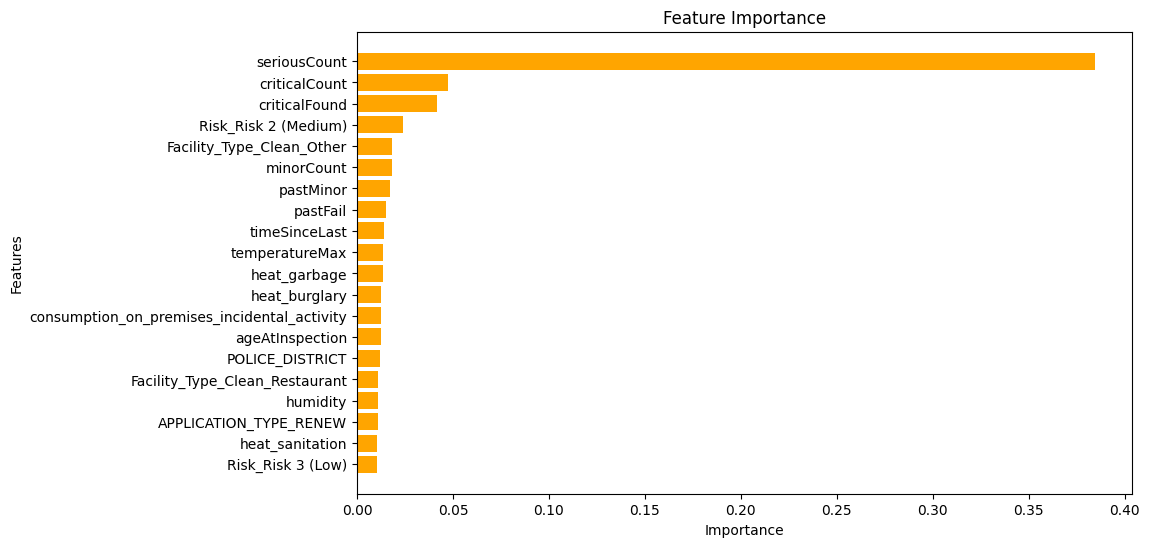

In [51]:
# evaluate
# what features were most important?

importances2014 = np.zeros(X2014.shape[1])

# average the feature importances over the folds
for estimator in cv_results['estimator']:
    importances2014 += estimator.feature_importances_
    
# divide by the number of folds
importances2014 /= 5  

# create a DataFrame for visualization
feature_importance2014 = pd.DataFrame({'feature': X2014.columns, 
                                   'importance': importances2014})

# sort the features by importance
feature_importance2014 = feature_importance2014.sort_values('importance', ascending=False)

# take the top 10 features
feature_importance2014 = feature_importance2014.head(20)

# plot the feature importances
plt.figure(figsize=(10, 6))

# horizontal bar plot
plt.barh(feature_importance2014['feature'], 
         feature_importance2014['importance'], 
         color='orange', 
         align='center')

# labels
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')

plt.gca().invert_yaxis() 
plt.show()

The results are similar the previous years' feature importance, in terms of secriousCount being the most important feature out of all the others. That being said, the second most important feature is criticalCount, which has an importance score of more than 0.05, much higher than the older dataset. The third more important feature is now criticalFound, which was not in the top 20 features by importance list generated in the previous semester. 

## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?

As I had mentioned earlier, accuracy is basically the sum of true positives and true negatives divided by the total number of samples. It is an overall measure of how well the model is performing, but results are only good when the model is balanced. This latter part is especially important when we talk about social sciences and public policy because such data usually tends to be more imbalanced (like our current data about businesses passing the food safety inspection. 

Precision is a ratio of true positives to the total predicted positives and is useful when false positives are a concern (court judgements). Recall is a ratio of true positives to the sum of true positives and false negative, and is very important in recognizing false negatives (like fraud/embezzlement). F1 score combines the two and is better  in terms of understanding imbalanced data. 

Moreover, there are major ethical concerns while using machine learning in the social sciences and public policy. We need to utilize all the parameters we have to reduce both false negatives (type 2) and false positives (type 1). Either of these can be equally bad, depending on the kind of policy it is dealing with, think court judgements vs cancer detection. Focusing on just accuracy can lead to overfitting, which will make the model less useful and applicable while using real world data. With the help of these other metrics, we can have a deeper understanding of the model, and interpret it better. The data in social sciences and public policy is much more nuanced because we make decisions for human beings and their welfare, which means terms like 'noise' and 'outlier' have a human angle. Lastly, it is also important to remember that data isn't always a good predictor of policy decisions. If so, orphan drugs would not have received heavy government assistance, since the cost-benefit analysis garnered through machine learning would have always voted to improving infectious diseases as opposed investing in treating rare medical conditions. r. 


2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

There definitely is a possibility of a feedback loop being created between who is audited and these businesses. there are a few ways to address this. The first would be conducting random audits, as opposed to only focusing in on high-risk businesses. Random audits, despite the costs are worth it because they lead to better compliance. 

Another option is also the reassess and update the features in the model once in two years or so. Given that we have seen a difference in the importance score between the data from 2011-2013 and that from 2014, it is a fair assumption to make that since features are dynamic, the model does have scope to change. 

Also, if the Public Health Department were to create a mechanism to get feedback from the people subject to this audit, it could be helpful in reducing the number audits, also ensuring better ties with the community, if you go there in real l? 

